# Sales Transaction Data (2018 - 2019)

## Content
This is a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.

The data set contains 500K rows and 8 columns. The following is the description of each column.

- transaction_no (categorical): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
- date (date): the date when each transaction was generated.
- product_no (categorical): a five or six-digit unique character used to identify a specific product.
- product (categorical): product/item name.
- price (numeric): the price of each product per unit in pound sterling (£).
- quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
- customer_no (categorical): a five-digit unique number that defines each customer.
- country (categorical): name of the country where the customer resides.

There is a small percentage of order cancellation in the data set. Most of these cancellations were due to out-of-stock conditions on some products. Under this situation, customers tend to cancel an order as they want all products delivered all at once.

## Questions

1. How was the sales trend over the months?
2. What are the most frequently purchased products?
3. How many products does the customer purchase in each transaction?
4. What are the most profitable segment customers?
5. Based on your findings, what strategy could you recommend to the business to gain more profit?

## Tableau Dashboard
1. [Map Dashboard](https://public.tableau.com/app/profile/eywick.francis/viz/UKE-commerceMapDashboard/MapSalesDashboard): displays revenue generated, number of customers, best selling products, and high revenue products per country, providing a visual overview of the sales performance across different regions.
2. [Monthly Sales Dashboard](https://public.tableau.com/app/profile/eywick.francis/viz/UKE-commerceMonthlySalesDashboard/MonthlySalesDashboard): provides a detailed monthly sales report, including key metrics such as revenue, number of transactions, quantity sold, as well as top selling products and top customers for each month.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Data Wrangling

In [2]:
# Options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 15)
plt.style.use('ggplot')
sns.set_style("whitegrid")

df = pd.read_csv(r'Sales Transaction.csv')
df.sample(5)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
401463,547903,3/28/2019,20675,Blue Polkadot Bowl,11.53,12,15039.0,United Kingdom
497708,539590,12/20/2018,17091J,Vanilla Incense In Tin,10.64,36,14733.0,United Kingdom
51462,578045,11/22/2019,22921,Herb Marker Chives,10.92,1,17297.0,United Kingdom
49414,578054,11/22/2019,22622,Box Of Vintage Alphabet Blocks,22.50,2,14911.0,EIRE
43598,578384,11/24/2019,22772,Pink Drawer Knob Acrylic Edwardian,6.19,12,16189.0,United Kingdom


In [3]:
df.shape

(536350, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [5]:
df.nunique()

TransactionNo    23204
Date               305
ProductNo         3768
ProductName       3768
Price              530
Quantity           510
CustomerNo        4738
Country             38
dtype: int64

Product NO and NAME have the same value. We can safely say each unique NO corresponds to a unique NAME and vice versa. There's also 38 countries and 4738 customers.

In [6]:
df.describe().round(2)

,Price,Quantity,CustomerNo
count,536350.00,536350.00,536295.00
mean,12.66,9.92,15227.89
std,8.49,216.66,1716.58
min,5.13,-80995.00,12004.00
25%,10.99,1.00,13807.00
50%,11.94,3.00,15152.00
75%,14.09,10.00,16729.00
max,660.62,80995.00,18287.00


## Converting Dtypes
We will be transforming Dtypes to have better memory usage and to improve the perfomance when we perform data manipulations. We will downcast some int and float. Also we will change some object to categorical and datetime.

Float:
- float16: range of approximately -65500.0 to 65500.0
- float32: range of approximately -3.4 x 10^38 to 3.4 x 10^38
- float64: range of approximately -1.8 x 10^308 to 1.8 x 10^308

Int:
- int8: range of -128 to 127
- int32: range of approximately -2.1 billion to 2.1 billion
- int64: range of approximately -9.2 x 10^18 to 9.2 x 10^18

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [8]:
# Transforming datatype to what we want.
dtypes = {
    'Date': 'datetime64',
    'Price': 'float32', 
    'CustomerNo': 'category',
    'Quantity': 'int32',
    'TransactionNo': 'category',
    'ProductNo': 'category',
    'ProductName': 'category',
    'Country': 'category'
}
df = df.astype(dtypes)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536350 non-null  category      
 1   Date           536350 non-null  datetime64[ns]
 2   ProductNo      536350 non-null  category      
 3   ProductName    536350 non-null  category      
 4   Price          536350 non-null  float32       
 5   Quantity       536350 non-null  int32         
 6   CustomerNo     536295 non-null  category      
 7   Country        536350 non-null  category      
dtypes: category(5), datetime64[ns](1), float32(1), int32(1)
memory usage: 13.9 MB


In [10]:
df.memory_usage(deep=True)

Index                128
TransactionNo    3066390
Date             4290800
ProductNo        1439364
ProductName      1521220
Price            2145400
Quantity         2145400
CustomerNo       1242740
Country           539898
dtype: int64

Converting our data to appropriate data types, like `category`, `int`, `float`, or `datetime`, our memory usage decreased from **32.7+ MB to 13.9 MB**. This will improve the performance, readability, and consistency of our data.

`category` can speed up grouping and sorting, numerical types are good for calculations, and `datetime` makes it easy to manipulate date and time data.

## Cleaning the data

before we do things, I want to change the columns to snakecase so I can easily use it when doing data manipulation.

In [11]:
df.columns = df.columns.str.lower()
df = (
    df.rename(
    columns={
        'transactionno': 'transaction_no', 
        'productno': 'product_no', 
        'productname': 'product_name', 
        'customerno': 'customer_no'
    })
)
df.columns

Index(['transaction_no', 'date', 'product_no', 'product_name', 'price',
       'quantity', 'customer_no', 'country'],
      dtype='object')

### Checking for null values

#### Null values observation

Out of the total dataset, there are 55 null values in the `customer_no` column which correspond to cancelled orders, while the occurrence of a single purchase without a `customer_no` is considered an error or anomaly in the data. As the number of null values is relatively small in comparison to the total dataset, removing these rows is unlikely to have a significant impact on the overall analysis. Therefore, it would be safe to drop these rows.

In [12]:
df_copy = df.copy()
df_copy.isnull().sample(5)

,transaction_no,date,product_no,product_name,price,quantity,customer_no,country
209601,False,False,False,False,False,False,False,False
499,False,False,False,False,False,False,False,False
409616,False,False,False,False,False,False,False,False
384110,False,False,False,False,False,False,False,False
111515,False,False,False,False,False,False,False,False


In [13]:
df_copy.isnull().sum()

transaction_no     0
date               0
product_no         0
product_name       0
price              0
quantity           0
customer_no       55
country            0
dtype: int64

In [14]:
df_copy[df_copy.customer_no.isnull()].sort_values('quantity').sample(5)

,transaction_no,date,product_no,product_name,price,quantity,customer_no,country
298352,558245,2019-06-27,22734,Set Of 6 Ribbons Vintage Christmas,10.250000,8,NaN,United Kingdom
342954,C553854,2019-05-19,21703,Bag 125g Swirly Marbles,10.680000,-1,NaN,United Kingdom
242407,C563015,2019-08-11,46000S,Polyester Filler Pad 40x40cm,10.250000,-220,NaN,United Kingdom
190598,C567518,2019-09-20,22846,Bread Bin Diner Style Red,27.620001,-1,NaN,United Kingdom
459432,C542860,2019-02-01,22580,Advent Calendar Gingham Sack,16.350000,-1,NaN,United Kingdom


In [15]:
len(df_copy.loc[(df_copy.customer_no.isnull())])

55

In [16]:
df_copy.dropna(subset=['customer_no'], inplace=True)
df_copy.isnull().sum()

transaction_no    0
date              0
product_no        0
product_name      0
price             0
quantity          0
customer_no       0
country           0
dtype: int64

### Checking for duplicates

#### Duplicates observation

I discovered that there are 9994 rows that contain duplicate data. Since it is possible for a customer to have multiple transactions, purchase the same product, and buy the same quantity, I have decided to retain these duplicates in the dataset rather than removing them.

In [17]:
df_copy[df_copy.duplicated(keep=False)]

,transaction_no,date,product_no,product_name,price,quantity,customer_no,country
984,581497,2019-12-09,21481,Fawn Blue Hot Water Bottle,7.24,1,17497.0,United Kingdom
985,581497,2019-12-09,21481,Fawn Blue Hot Water Bottle,7.24,1,17497.0,United Kingdom
1350,581538,2019-12-09,22992,Revolver Wooden Ruler,6.19,1,14446.0,United Kingdom
1354,581538,2019-12-09,22694,Wicker Star,6.19,1,14446.0,United Kingdom
1356,581538,2019-12-09,23275,Set Of 3 Hanging Owls Ollie Beak,6.19,1,14446.0,United Kingdom
...,...,...,...,...,...,...,...,...
535327,536569,2018-12-01,21809,Christmas Hanging Tree With Bell,11.53,1,16274.0,United Kingdom
535959,536592,2018-12-01,82613A,Metal Sign Cupcake Single Hook,12.82,1,16592.0,United Kingdom
535960,536592,2018-12-01,82613A,Metal Sign Cupcake Single Hook,12.82,1,16592.0,United Kingdom
536189,536528,2018-12-01,22839,3 Tier Cake Tin Green And Cream,25.57,1,15525.0,United Kingdom


In [18]:
df_copy[df_copy.duplicated(keep=False)][['customer_no']].head()

,customer_no
984,17497.0
985,17497.0
1350,14446.0
1354,14446.0
1356,14446.0


In [19]:
df_copy.query('customer_no == 17497.0').nunique()

transaction_no      2
date                2
product_no        382
product_name      382
price              27
quantity           28
customer_no         1
country             1
dtype: int64

# Exploratory Data Analysis

To answer our questions, I would filter the df to only get the orders that has not been cancelled. I would also be calculating for the revenue, so we wouldn't add them in each of our dataframe.

In [20]:
df_copy = df_copy.query('quantity > 0')
df_copy['revenue'] = (df_copy.price * df_copy.quantity).round(2)

df_copy.sort_values('quantity', ascending=False)

,transaction_no,date,product_no,product_name,price,quantity,customer_no,country,revenue
142,581483,2019-12-09,23843,Paper Craft Little Birdie,12.380000,80995,16446.0,United Kingdom,1002718.11
473985,541431,2019-01-18,23166,Medium Ceramic Top Storage Jar,11.320000,74215,12346.0,United Kingdom,840113.78
41367,578841,2019-11-25,84826,Asstd Design 3d Paper Stickers,6.190000,12540,13256.0,United Kingdom,77622.60
117790,573008,2019-10-27,84077,World War 2 Gliders Asstd Designs,10.470000,4800,12901.0,United Kingdom,50256.00
331834,554868,2019-05-27,22197,Popcorn Holder,10.990000,4300,13135.0,United Kingdom,47257.00
...,...,...,...,...,...,...,...,...,...
198525,566787,2019-09-15,23355,Hot Water Bottle Keep Calm,21.309999,1,15787.0,United Kingdom,21.31
198523,566787,2019-09-15,23243,Set Of Tea Coffee Sugar Tins Pantry,21.309999,1,15787.0,United Kingdom,21.31
412799,546951,2019-03-18,22149,Feltcraft 6 Flower Friends,12.400000,1,17673.0,United Kingdom,12.40
412800,546951,2019-03-18,22149,Feltcraft 6 Flower Friends,12.400000,1,17673.0,United Kingdom,12.40


## Q: How was the sales trend over the months?

### Answer:
The sales trend over the year (December 2018 to December 2019) shows a mixed performance, with some months showing growth in revenue and others experiencing a decline. The first quarter of 2019 started with fluctuations, followed by a stable period from May to August. The standout months were from September to November 2019, with the biggest growth in revenue occurring in September, and the highest revenue was generated in November. However, the year ended on a low note with a significant drop in revenue in December 2019.

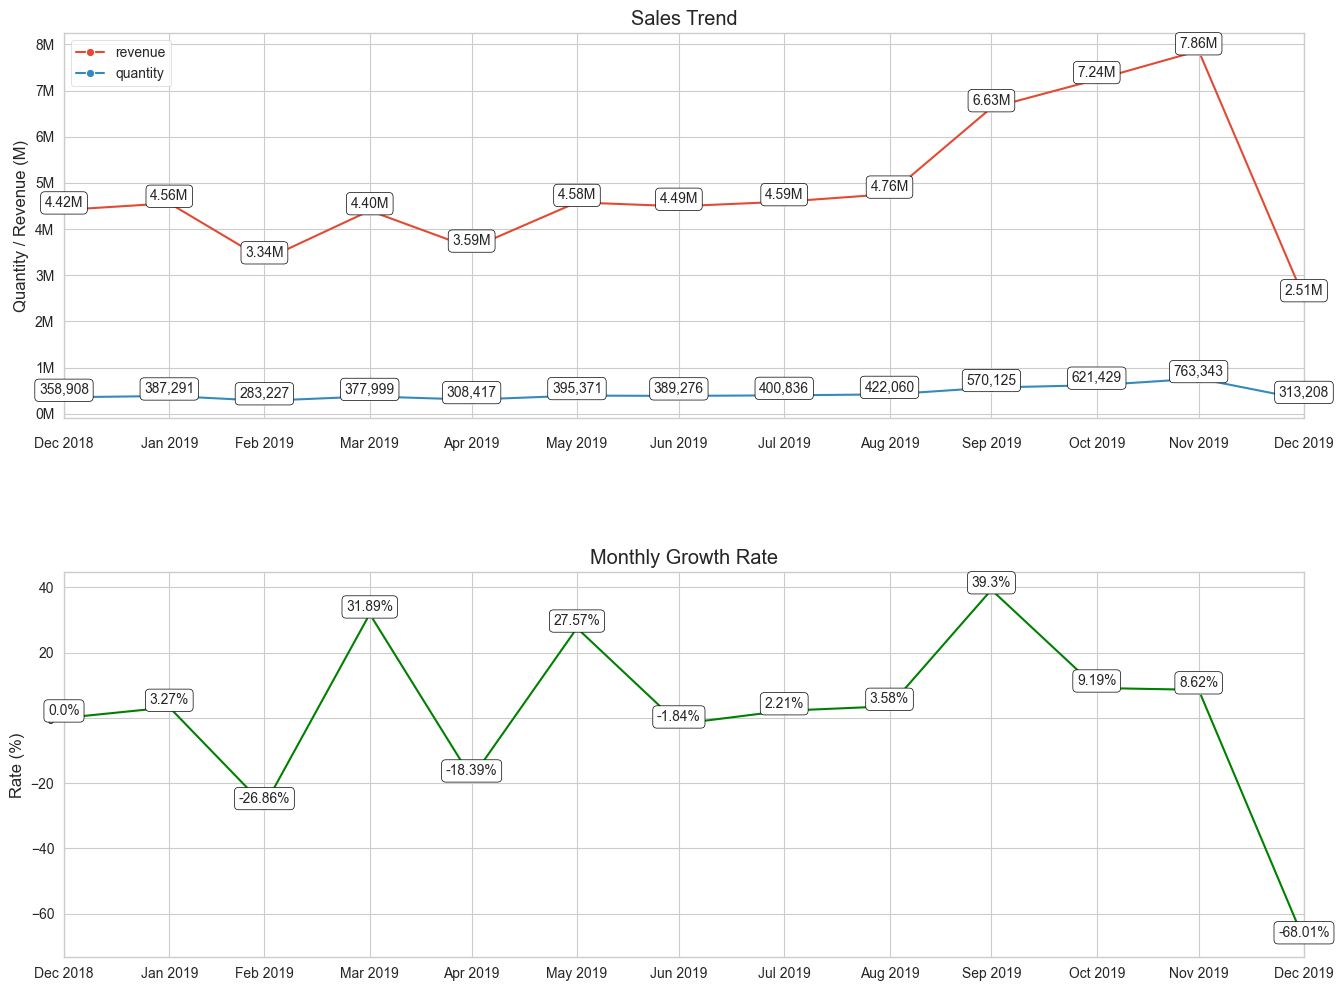

In [21]:
# Check cancelled transaction, and successful transaction
len(df_copy.query('quantity < 0')), len(df_copy.query('quantity > 0'))

(0, 527764)

In [22]:
# Highest value is 2019-12-09 and lowest is 2018-12-01
df_copy.date.describe(datetime_is_numeric=True).to_frame()

,date
count,527764
mean,2019-07-04 05:58:58.445213952
min,2018-12-01 00:00:00
25%,2019-03-28 00:00:00
50%,2019-07-20 00:00:00
75%,2019-10-19 00:00:00
max,2019-12-09 00:00:00


Min date is 2018-12-01 and max is 2019-12-09. This confirms our data is only valid for a year (2018-2019)

I will group the sales data by month, aggregating the total quantity sold and revenue for each month. I will also be calculating for the Month-over-Month growth rate and gain insight into the overall growth of our business.

In [23]:
df_monthly_revenue = df_copy.copy()

# Group by and aggregate sum of Quantity Sold and Revenue.
df_monthly_revenue = df_monthly_revenue \
.groupby(pd.Grouper(key='date', freq='M')) \
.agg({'quantity': 'sum', 'revenue': 'sum'}).reset_index()

# Calculate the percentage change in revenue between consecutive months
# ((new_value - old_value) / old_value) * 100
df_monthly_revenue['mom_growth'] = df_monthly_revenue.revenue.pct_change() * 100

# I know already that the 1st month will be NaN so I will replace it by 0.
df_monthly_revenue.mom_growth.fillna(0, inplace=True)


df_monthly_revenue

,date,quantity,revenue,mom_growth
0,2018-12-31,358908,4415415.52,0.000000
1,2019-01-31,387291,4559856.35,3.271285
2,2019-02-28,283227,3335017.18,-26.861354
3,2019-03-31,377999,4398401.60,31.885426
4,2019-04-30,308417,3589497.88,-18.390856
5,2019-05-31,395371,4578965.08,27.565616
6,2019-06-30,389276,4494648.81,-1.841383
7,2019-07-31,400836,4593867.06,2.207475
8,2019-08-31,422060,4758356.02,3.580621
9,2019-09-30,570125,6628303.06,39.298174


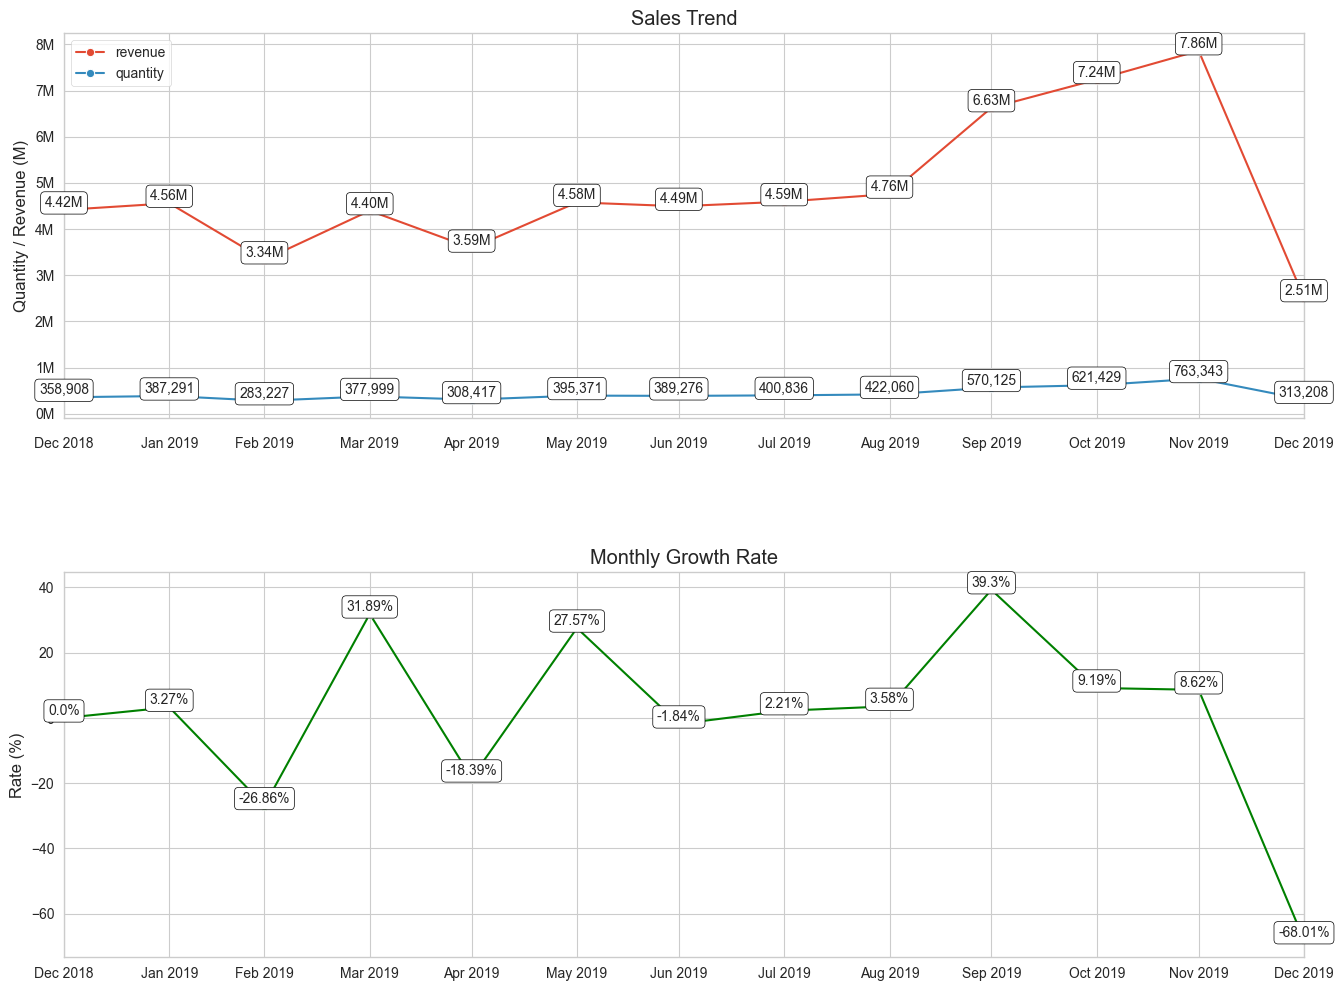

In [24]:
fig, (ax, ax_growth) = plt.subplots(2, 1, figsize=(16, 12))

# Plots
sns.lineplot(x='date', y='revenue', data=df_monthly_revenue, marker='o', label='revenue', ax=ax)
sns.lineplot(x='date', y='quantity', data=df_monthly_revenue, marker='o', label='quantity', ax=ax)

# Format y-axis labels with "M" suffix (1e6/1_000_000 = 1M)
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x/1_000_000)}M')
ax.yaxis.set_major_formatter(formatter)

# Labels for Revenue chart
ax.set(
    xlim=(df_monthly_revenue.date.min(), df_monthly_revenue.date.max()),
    xticks=df_monthly_revenue.date,
    xticklabels=[date.strftime('%b %Y') for date in df_monthly_revenue.date],
    ylabel='Quantity / Revenue (M)',
    xlabel='',
    title='Sales Trend'
)
ax.tick_params(axis='x', pad=10)
ax.legend()

# Value labels for Revenue Chart
for x, y in zip(df_monthly_revenue.date, df_monthly_revenue.quantity):
    ax.text(x, y, f'{y:,}', ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

for x, y in zip(df_monthly_revenue.date, df_monthly_revenue.revenue):
    ax.text(x, y, f'{y/1_000_000:,.2f}M', ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


# Plot for MoM growth
sns.lineplot(x='date', y='mom_growth', data=df_monthly_revenue, marker='o', ax=ax_growth, color="green")

# Labels for MoM growth chart
ax_growth.set(
    xlim=(df_monthly_revenue.date.min(), df_monthly_revenue.date.max()),
    xticks=df_monthly_revenue.date,
    xticklabels=[date.strftime('%b %Y') for date in df_monthly_revenue.date],
    ylabel='Rate (%)',
    xlabel='',
    title='Monthly Growth Rate'
)

# Value labels for MoM growth chart
for x, y in zip(df_monthly_revenue.date, df_monthly_revenue.mom_growth):
    ax_growth.text(x, y, f'{round(y, 2)}%', ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# set padding between subplots
plt.subplots_adjust(hspace=0.4)
plt.show()

In [25]:
# Get the annual average of rev and growth
revenue_avg = df_monthly_revenue.revenue.mean().round(2)
revenue_median = df_monthly_revenue.revenue.median().round(2)
total_revenue = df_monthly_revenue.revenue.sum()

growth_rate_avg = df_monthly_revenue.mom_growth.mean().round(2)
growth_rate_median = df_monthly_revenue.mom_growth.median().round(2)

print(
    f"""
    Total Revenue: {total_revenue:,}
    Annual Revenue Avg: {revenue_avg:,}
    Median: {revenue_median:,}
    
    Annual Growth Avg: {growth_rate_avg}%
    Median: {growth_rate_median}%
    """
)


    Total Revenue: 62,965,892.33
    Annual Revenue Avg: 4,843,530.18
    Median: 4,559,856.35
    
    Annual Growth Avg: 0.81%
    Median: 3.27%
    


## Q: What are the most frequently purchased products?

#### Answer:
The top 10 most frequently purchased products are:

1. Paper Craft Little Birdie
1. Medium Ceramic Top Storage Jar
1. Popcorn Holder
1. World War 2 Gliders Asstd Designs
1. Jumbo Bag Red Retrospot
1. Cream Hanging Heart T-Light Holder
1. Pack Of 72 Retrospot Cake Cases
1. Assorted Colour Bird Ornament
1. Rabbit Night Light
1. Mini Paint Set Vintage


#### Top Purchased Product by Quantity

I'll groupby the product_no and retain the first product_name and sum the quantity to find the top purchased product by quantity.

In [26]:
df_top_product = df_copy.copy()

# Group by, sum the 'Quantity' column for each group, and retain the first value of 'ProductName' column within each group.
df_top_product = df_top_product.groupby('product_no').agg({'product_name': 'first', 'quantity': 'sum'}).reset_index()
df_top_product.dropna(subset='product_name', inplace=True)

df_top_product.sort_values('quantity', ascending=False).head(10)

,product_no,product_name,quantity
2450,23843,Paper Craft Little Birdie,80995
2008,23166,Medium Ceramic Top Storage Jar,78033
1097,22197,Popcorn Holder,56921
2848,84077,World War 2 Gliders Asstd Designs,55047
3271,85099B,Jumbo Bag Red Retrospot,48478
3286,85123A,Cream Hanging Heart T-Light Holder,37956
427,21212,Pack Of 72 Retrospot Cake Cases,36515
3104,84879,Assorted Colour Bird Ornament,36493
1930,23084,Rabbit Night Light,30788
1362,22492,Mini Paint Set Vintage,26633


#### Monthly Most Purchased Product

I'll create a dataframe that summarizes the products purchased each month

In [27]:
df_monthly_product = df_copy.copy()

# Group by Date and ProductNo
# sum the 'Quantity' column for each group, and retain the first value of 'ProductName' column within each group.
df_monthly_product = (
    df_monthly_product
    .groupby([pd.Grouper(key='date', freq='M'), 'product_no'])
    .agg({'product_name': 'first', 'quantity': 'sum', 'revenue': 'sum'})
    .reset_index()
)

# Let's drop the null/nan values, it just means no one purchased the product in that month.
df_monthly_product.dropna(subset=['product_name'], inplace=True)

df_monthly_product.query('date == "2019-12-31"').sort_values('quantity', ascending=False).head()

,date,product_no,product_name,quantity,revenue
47666,2019-12-31,23843,Paper Craft Little Birdie,80995,1002718.11
46313,2019-12-31,22197,Popcorn Holder,6217,39442.45
47146,2019-12-31,23084,Rabbit Night Light,4311,27737.33
47609,2019-12-31,23582,Vintage Doily Jumbo Bag Red,2101,13152.28
46210,2019-12-31,22086,Paper Chain Kit 50'S Christmas,2089,13407.19


After that I will group it by date again and get the top 5 products by quantity

In [28]:
# Each month, select the top 5 rows with the highest Quantity value using the nlargest method
df_top_monthly = df_monthly_product.groupby(pd.Grouper(key='date', freq='M')).apply(lambda x: x.nlargest(5, 'quantity'))

# Drop the date column so the table looks clean
df_top_monthly.drop('date', axis=1, inplace=True)

# Display everything
with pd.option_context("display.max_rows", 15):  # Change 15 to None to view all.
    display(df_top_monthly.sort_values(['date', 'quantity'], ascending=[False, False]))

product_no                        product_name  quantity  \
date                                                                        
2019-12-31 47666      23843           Paper Craft Little Birdie     80995   
           46313      22197                      Popcorn Holder      6217   
           47146      23084                  Rabbit Night Light      4311   
           47609      23582         Vintage Doily Jumbo Bag Red      2101   
           46210      22086      Paper Chain Kit 50'S Christmas      2089   
...                     ...                                 ...       ...   
2018-12-31 2848       84077   World War 2 Gliders Asstd Designs      5195   
           427        21212     Pack Of 72 Retrospot Cake Cases      4106   
           3286      85123A  Cream Hanging Heart T-Light Holder      3871   
           1691       22834         Hand Warmer Babushka Design      3502   
           1097       22197                      Popcorn Holder      2738   

                     revenue  
date                          
2019-12-31 47666  1002718.11  
           46313    39442.45  
           47146    27737.33  
           47609    13152.28  
           46210    13407.19  
...                      ...  
2018-12-31 2848     54446.03  
           427      44828.18  
           3286     51179.69  
           1691     40688.31  
           1097     30761.19  

[65 rows x 4 columns]

## Q: How many products does a customer purchase in each transaction?

#### Answer:
The average number of products purchased by customers in each transaction is `21.1`. Additionally, the average purchase quantity in each transaction is `9.73`.

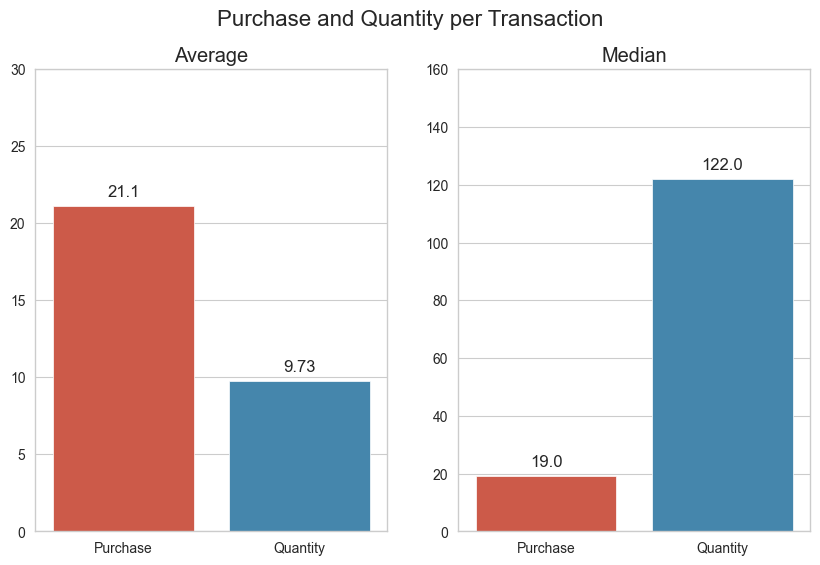

In [29]:
df_transaction = df_copy.copy()
df_transaction.nunique()

transaction_no    19789
date                305
product_no         3753
product_name       3753
price               514
quantity            375
customer_no        4718
country              38
revenue            5591
dtype: int64

In [30]:
# Functions to be used
# IQR
def calc_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

#### Average/Median purchase products of each transaction per customer

I'll be grouping the customer_no and transaction_no and count the product_name, then I will take the average purchase of each customer per transaction.

In [31]:
# Get the average purchase product of all transaction per customer.
df_purchase_per_transaction = (
    df_transaction
    .groupby(['customer_no', 'transaction_no'])
    .agg(purchase_count=('product_name', 'count'))
    .query('purchase_count > 0')
    .groupby(['customer_no'])
    .agg(avg_purchase_per_transaction=('purchase_count', 'mean'))
    .reset_index()
)

# Average purchase product of all transaction per customer.
df_purchase_per_transaction.sort_values('avg_purchase_per_transaction', ascending=False).sample(5)

,customer_no,avg_purchase_per_transaction
3324,16473.0,6.000000
3783,17058.0,20.666667
1730,14451.0,54.500000
697,13127.0,15.000000
287,12609.0,19.000000


I'll be filtering the data to get better average, because the outlier is too big.

In [32]:
# IQR
lower_bound, upper_bound = calc_iqr(df_purchase_per_transaction['avg_purchase_per_transaction'])

# Filter
df_iqr_filter = df_purchase_per_transaction.query('@lower_bound < avg_purchase_per_transaction < @upper_bound')

# Average purchase product in each transaction per customer
# Mean/Median
print(
    f"""
    IQR:
    Upper: {upper_bound}
    Lower: {lower_bound}
    
    Purchase product per transaction:
    Average: {df_iqr_filter['avg_purchase_per_transaction'].mean().round(2)}
    Median: {df_purchase_per_transaction['avg_purchase_per_transaction'].median()}
    """
)


    IQR:
    Upper: 71.1875
    Lower: -26.712500000000006
    
    Purchase product per transaction:
    Average: 21.1
    Median: 19.0
    


#### Average/Median quantity purchase per transaction

I'll also calculate the quantity of each product per transaction and get the average. I will groupby transaction and sum the quantity per transaction.

In [33]:
df_quantity_transaction = (
    df_transaction
    .groupby(['transaction_no'])[['quantity']]
    .sum()
    .sort_values('quantity', ascending=False)
    .query('quantity > 0')
    .reset_index()
)
df_quantity_transaction

,transaction_no,quantity
0,581483,80995
1,541431,74215
2,556917,15049
3,563076,14730
4,574941,14149
...,...,...
19784,561895,1
19785,542127,1
19786,561683,1
19787,542234,1


In [34]:
# IQR
lower_bound, upper_bound = calc_iqr(df_quantity_transaction['quantity'])

# Filter
df_iqr_filter = df_transaction.query('@lower_bound < quantity < @upper_bound')

# Mean/Median quantity sold in each transaction
print(
    f"""
    IQR:
    Upper: {upper_bound}
    Lower: {lower_bound}
    
    Purchase quantity per transaction:  
    Average: {df_iqr_filter['quantity'].mean().round(2)}
    Median: {df_quantity_transaction['quantity'].median()}
    """
)


    IQR:
    Upper: 638.5
    Lower: -269.5
    
    Purchase quantity per transaction:  
    Average: 9.75
    Median: 153.0
    


#### Outliers

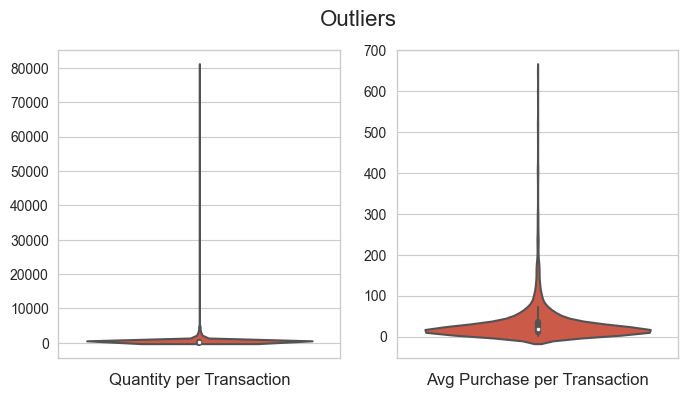

In [35]:
fig, (ax, ax_transaction) = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(hspace=0.4)

# Plots
sns.violinplot(df_transaction.groupby('transaction_no')[['quantity']].sum(), ax=ax)
sns.violinplot(df_purchase_per_transaction['avg_purchase_per_transaction'].values, ax=ax_transaction)

# Rename x label
for axis in [ax, ax_transaction]:
    axis.set(xticklabels=[])
    
ax.set_xlabel('Quantity per Transaction')
ax_transaction.set_xlabel('Avg Purchase per Transaction')

# Title
plt.suptitle('Outliers', fontsize=16)

plt.show()

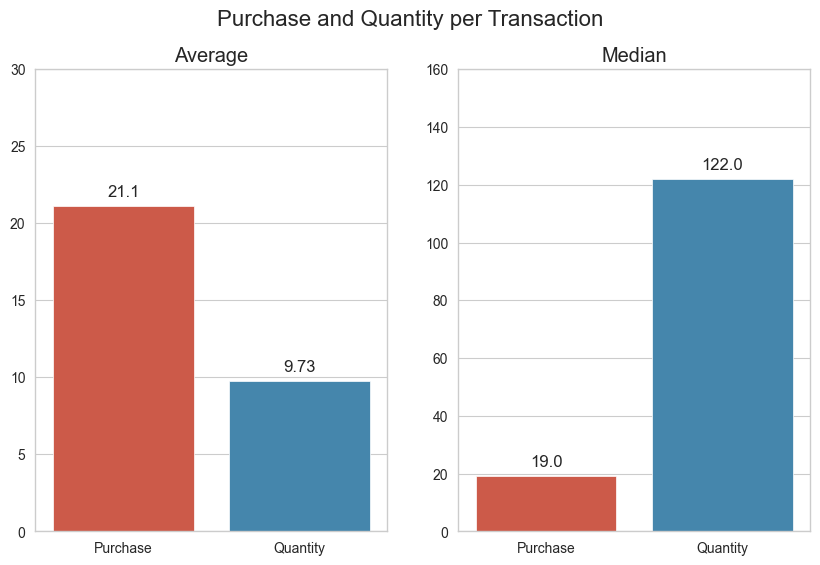

In [36]:
# Average Purchase
df_purchase_per_transaction = (
    df_transaction
    .groupby(['customer_no', 'transaction_no'])
    .agg(purchase_count=('product_name', 'count'))
    .query('purchase_count > 0')
    .groupby(['customer_no'])
    .agg(avg_purchase_per_transaction=('purchase_count', 'mean'))
    .reset_index()
)

# calculate the Purchase IQR
lower_bound, upper_bound = calc_iqr(df_purchase_per_transaction['avg_purchase_per_transaction'])

iqr_purchase = df_purchase_per_transaction.query('@lower_bound < avg_purchase_per_transaction < @upper_bound')
avg_purchase = iqr_purchase['avg_purchase_per_transaction'].mean().round(2)

# Average Quantity
df_quantity_transaction = df_transaction.groupby('transaction_no')[['quantity']].sum().reset_index()

# calculate the Quantity IQR
lower_bound, upper_bound = calc_iqr(df_quantity_transaction['quantity'])

iqr_quantity = df_transaction.query('@lower_bound < quantity < @upper_bound')
avg_quantity = iqr_quantity['quantity'].mean().round(2)

# Calculate the median quantity sold in each transaction and purchase products per transaction
median_quantity, median_purchase = df_quantity_transaction['quantity'].median(), df_purchase_per_transaction['avg_purchase_per_transaction'].median()

# Plot
fig, (ax, ax_median) = plt.subplots(1, 2, figsize=(10, 6))
plt.subplots_adjust(hspace=0.4)

# Create a bar plot for average
sns.barplot(x=['Purchase', 'Quantity'],
            y=[avg_purchase, avg_quantity], ax=ax)

# Labels for average
ax.set(
    ylim=(None, 30),
    title='Average'
)

# Create a bar plot
sns.barplot(x=['Purchase', 'Quantity'],
            y=[median_purchase, median_quantity], ax=ax_median)

# Labels for median
ax_median.set(
    ylim=(None, 160),
    title='Median'
)

# Add value labels for average and median chart
for p, p_median in zip(ax.containers, ax_median.containers):
    ax.bar_label(p, label_type='edge', padding=5, fontsize=12, labels=[round(val, 2) for val in p.datavalues])
    ax_median.bar_label(p_median, label_type='edge', padding=5, fontsize=12, labels=[round(val, 2) for val in p_median.datavalues])

plt.suptitle('Purchase and Quantity per Transaction', fontsize=16)
plt.show()

## Q: What are the most profitable segment customers?

#### Answer:
I cannot accurately determine the most profitable segment customers without knowing the Profit Margin and CAC of the company.

However, the UK, Netherlands, EIRE, Germany, and France were our top revenue-generating countries, collectively accounting for 93.85% of our total revenue. The next five countries in our ranking contributed 3.71% of the total revenue.

It is worth mentioning that Netherlands and EIRE, despite having a lower number of customers, generated high revenue. Therefore, these countries could be promising segments to prioritize. I recommend exploring ways to further capitalize on these markets and potentially expand the customer base in these regions.

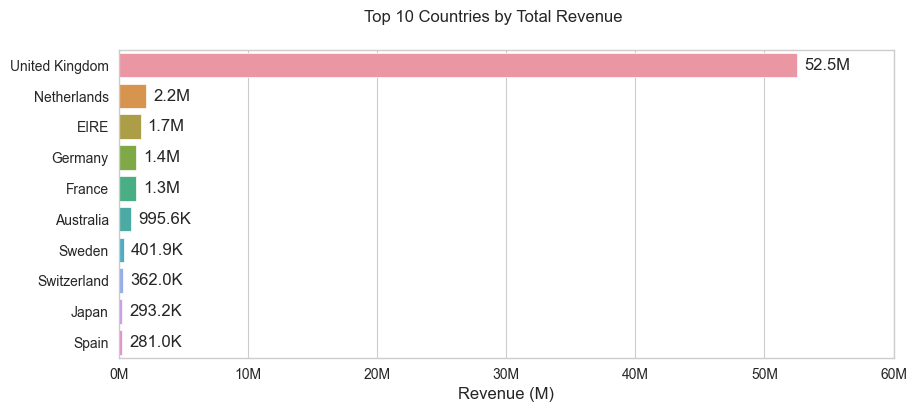

In [37]:
df_customers = df_copy.copy()
df_customers.head()

,transaction_no,date,product_no,product_name,price,quantity,customer_no,country,revenue
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.469999,12,17490.0,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.650000,36,13069.0,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.530000,12,13069.0,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.650000,12,13069.0,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.940000,6,13069.0,United Kingdom,71.64


I will group the users by country and aggregate the total revenue and quantity sold for each country, so we can answer this question.

#### Sales by Region (Customer Segmentation)
Customer segmentation is the process of dividing a customer base into groups or segments based on shared characteristics or behaviors, in order to better understand and serve their needs.

By segmenting the customer base based on their country of origin and calculating the total revenue for each segment, businesses can gain valuable insights into the spending habits of customers from different countries. These insights can help businesses to develop more effective marketing, pricing, and customer service strategies that are tailored to the needs and preferences of each country segment.

In [38]:
df_user_country = (
    df_customers
    .groupby('country')
    .agg({'quantity': 'count', 'revenue': 'sum', 'customer_no': 'nunique'})
    .reset_index()
    .rename(columns={'customer_no': 'customers'})
)
df_user_country.sort_values('revenue', ascending=False).head()

,country,quantity,revenue,customers
36,United Kingdom,477770,52524576.46,4305
24,Netherlands,2326,2151553.59,9
10,EIRE,7807,1713410.95,13
14,Germany,10240,1371543.27,91
13,France,10393,1330652.89,87


In [39]:
# Get top 5 and top 10 countries by revenue
top_5 = df_user_country.nlargest(5, 'revenue')
top_10 = df_user_country.nlargest(10, 'revenue')

# Calculate total revenue and revenue for each group
total_revenue = df_user_country['revenue'].sum()
top_5_revenue = top_5['revenue'].sum()
top_10_revenue = top_10['revenue'].sum()

# Calculate percentage of revenue for each group
pct_top_5 = (top_5_revenue / total_revenue) * 100
pct_top_6_to_10 = ((top_10_revenue - top_5_revenue) / total_revenue) * 100

print(f"""
Sum of revenue: {total_revenue:,}

Top 5 countries revenue: 
{top_5_revenue:,.2f} ({pct_top_5:.2f}%)

Top 6-10 countries:
{(top_10_revenue - top_5_revenue):,.2f} ({pct_top_6_to_10:.2f}%)
""")


Sum of revenue: 62,965,892.33

Top 5 countries revenue: 
59,091,737.16 (93.85%)

Top 6-10 countries:
2,333,624.76 (3.71%)



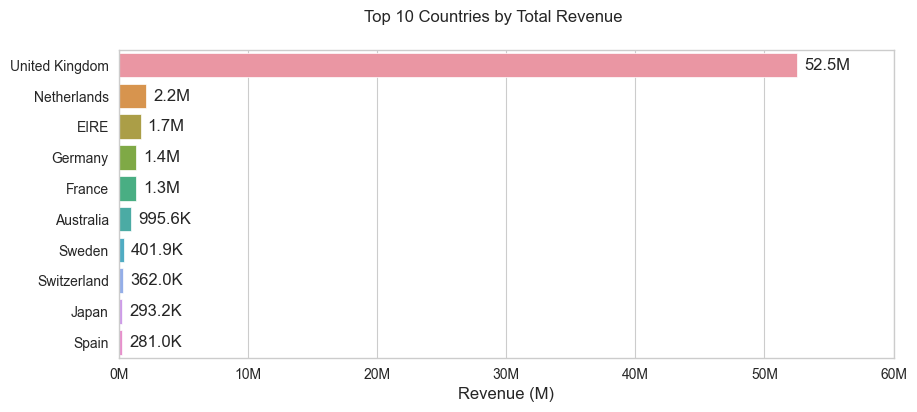

In [40]:
# Get largest AvgSpent/Total top 5.
top5_countries_total = df_user_country['revenue'].nlargest(10).index

# New DF for top 5.
df_top5_total = df_user_country.loc[top5_countries_total].reset_index()

# Create two subplots
fig, ax_total = plt.subplots(figsize=(10, 4))

# Total revenue plot
sns.barplot(x='revenue', y='country', data=df_top5_total, order=df_top5_total['country'], ax=ax_total, orient='h')

# Format x-axis labels with "M" suffix (1e6/1_000_000 = 1M)
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x/1_000_000)}M')
ax_total.xaxis.set_major_formatter(formatter)

# Labels for chart
ax_total.set(
    ylabel='',
    xlabel='Revenue (M)',
    xticks=(np.arange(0, df_top5_total['revenue'].max() + 10_000_000, 10_000_000)),
    title=''
)

# Add value labels for top rev country
for p in ax_total.containers:
    total_labels = [f'{val/1_000_000:.1f}M' if val >= 1_000_000 else f'{val/1_000:.1f}K' for val in p.datavalues]
    ax_total.bar_label(p, label_type='edge', padding=5, fontsize=12, labels=total_labels)

plt.suptitle('Top 10 Countries by Total Revenue')
plt.show()

## Q: Based on your findings, what strategy could you recommend to the business to gain more profit?

### Answer:
1. The business should focus on optimizing its product offering by prioritizing the sale of the highest revenue-generating products and discontinuing the least purchased products, particularly those with sales of 11 units or less. This approach will enable the business to focus its resources on the most profitable products, thereby increasing overall profitability.


2. Prioritize the top 50 customers and work to ensure their satisfaction. These customers are responsible for approximately 30% of the company's overall revenue, with a combined revenue of around 19,058,371 out of 62,965,892. By offering promotions on the items that these customers have purchased in the past, the business can incentivize them to continue making purchases, thereby ensuring a steady stream of revenue from these valuable customers.

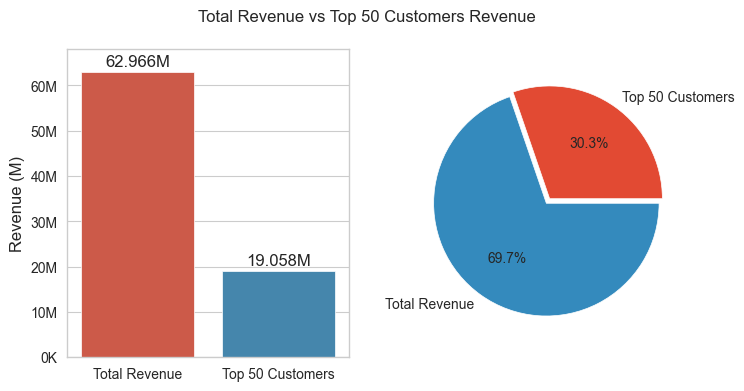


3. The business should focus some of its marketing efforts on the countries with a high sales revenue but low customer count, such as the Netherlands, EIRE, and Australia. By targeting these regions with tailored marketing campaigns, the business can attract new customers and increase revenue.
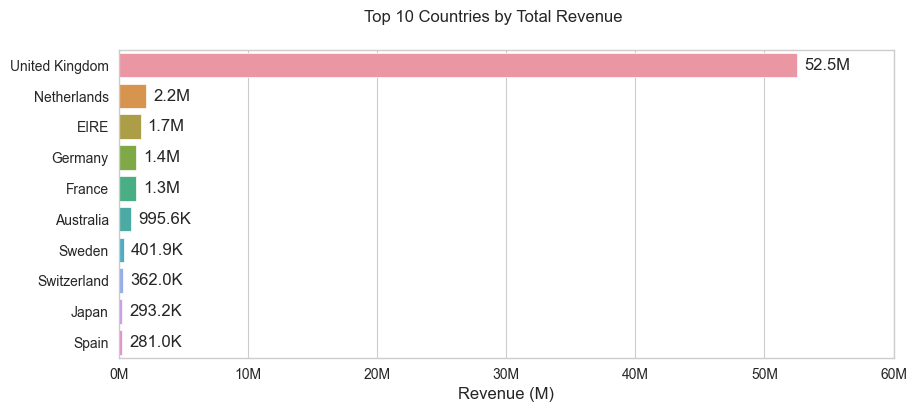

### Top 50 Spender

We will group by country and customer, and sum their revenue to get the total revenue per customer in each country. This will allow us to identify the top 50 customers based on their total revenue and show their country.

Next, we will group these top 50 customers by their country to see how many of them are in each country. This will give us an idea of which countries have the most high-spending customers among the top 50.

In [41]:
df_top_spender = df_copy.copy()

# Group by
df_top_spender = df_top_spender.groupby(['country', 'customer_no'])[['revenue']].sum().reset_index()

df_top_spender.query('revenue > 0').sample(5)

,country,customer_no,revenue
173533,United Kingdom,16005.0,2655.62
171882,United Kingdom,13900.0,5128.45
174846,United Kingdom,17679.0,9514.26
171683,United Kingdom,13656.0,5291.66
174356,United Kingdom,17045.0,1710.44


In [42]:
df_top_spender_50 = df_top_spender['revenue'].nlargest(50).index

# Filter the index to get the nlargest 50
df_top_spender_50 = df_top_spender.loc[df_top_spender_50].reset_index().drop('index', axis=1)

# Groupby country and agg
df_top_spender_by_country = (
    df_top_spender_50.groupby('country')
    .agg({'revenue': 'sum', 'customer_no': 'nunique'})
    .reset_index()
    .sort_values('revenue', ascending=False)
)

# Drop countries that has 0 rev
df_top_spender_by_country.drop(df_top_spender_by_country[df_top_spender_by_country['revenue'] <= 0].index, inplace=True)
df_top_spender_by_country = df_top_spender_by_country.rename(columns={'customer_no': 'customers'})
df_top_spender_by_country

,country,revenue,customers
36,United Kingdom,13697791.21,42
24,Netherlands,2112282.03,1
10,EIRE,1609598.54,2
0,Australia,900545.54,1
32,Sweden,365681.20,1
20,Japan,136322.73,1
13,France,120696.22,1
25,Norway,115454.49,1


Total generated revenue of the top 50 spenders

In [43]:
# Generated revenue from top 50 country.
df_top_spender_by_country.revenue.sum()

19058371.96

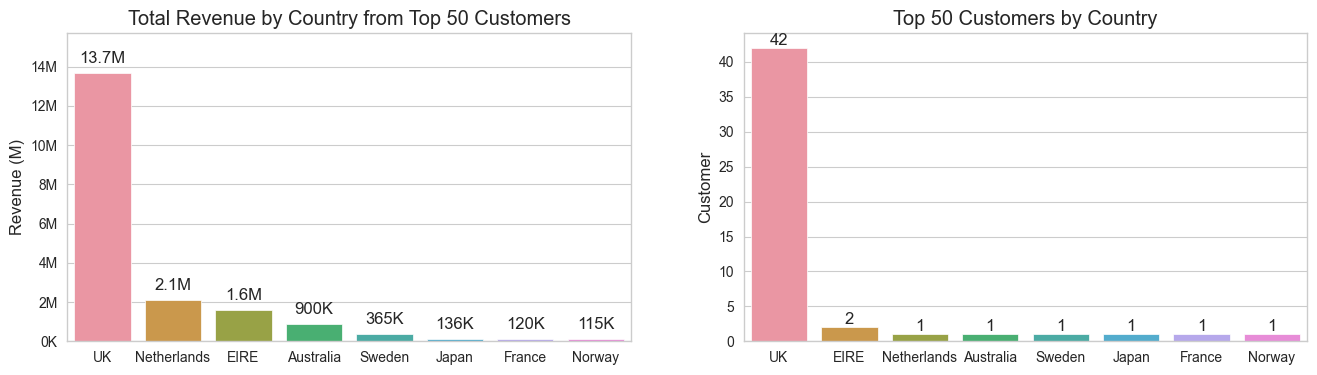

In [44]:
overall_revenue = df_user_country.revenue.sum()
top_50_revenue = df_top_spender_by_country.revenue.sum()

# Replace "United Kingdom" with "UK"
df_top_spender_by_country['country'] = df_top_spender_by_country['country'].replace('United Kingdom', 'UK')

fig, (ax_spenders, ax_customers) = plt.subplots(ncols=2, figsize=(16, 4), gridspec_kw={"wspace": 0.2})

# Plots
sns.barplot(
    x="country", y="revenue",
    order=df_top_spender_by_country['country'], data=df_top_spender_by_country, ax=ax_spenders
)
sns.barplot(
    x="country", y="customers",
    order=df_top_spender_by_country.sort_values('customers', ascending=False)['country'], 
    data=df_top_spender_by_country, ax=ax_customers
)

# Labels for Revenue generated of top 50 customers
ax_spenders.set(
    ylabel='Revenue (M)',
    xlabel='',
    ylim=(0, df_top_spender_by_country['revenue'].max() + 2_000_000),
    title='Total Revenue by Country from Top 50 Customers'
)

# Labels for Customer Count
ax_customers.set(
    ylabel='Customer',
    xlabel='',
    title='Top 50 Customers by Country'
)

# Format y-axis labels with "M" suffix (1e6/1_000_000 = 1M)
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x/1_000_000)}M' if x >= 1000000 else f'{int(x/1_000)}K')
ax_spenders.yaxis.set_major_formatter(formatter)

# Add value labels on each bar chart
for p_spenders, p_customers in zip(ax_spenders.containers, ax_customers.containers):
    labels_spenders = [f'{val/1_000_000:.1f}M' if val >= 1000000 else f'{int(val/1_000)}K' for val in p_spenders.datavalues]
    labels_customers = [f'{int(val)}' for val in p_customers.datavalues]
    ax_spenders.bar_label(p_spenders, label_type='edge', padding=5, fontsize=12, labels=labels_spenders)
    ax_customers.bar_label(p_customers, label_type='edge', fontsize=12, labels=labels_customers)

plt.show()

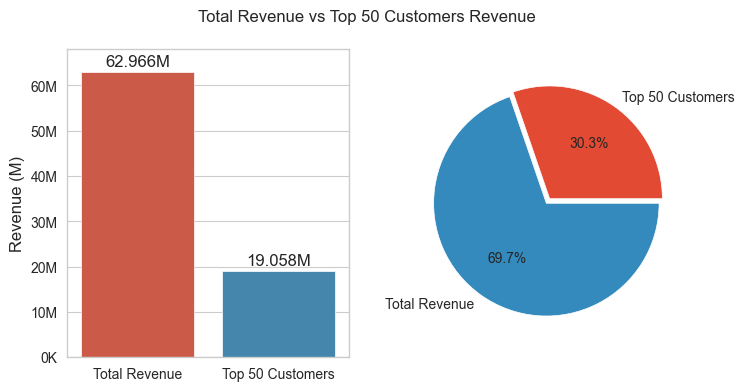

In [45]:
overall_revenue = df_user_country.revenue.sum()
top_50_revenue = df_top_spender_by_country.revenue.sum()

fig, (ax, ax_pie) = plt.subplots(1, 2, figsize=(8, 4))

# Create a revenue plot
sns.barplot(x=['Total Revenue', 'Top 50 Customers'], y=[overall_revenue, top_50_revenue], ax=ax)

# Set plot title and axes labels for average
ax.set(
    ylabel='Revenue (M)',
    xlabel='',
    ylim=(0, overall_revenue + 5_000_000)
)

# Format y-axis labels with "M" suffix (1e6/1_000_000 = 1M)
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x/1_000_000)}M' if x >= 1000000 else f'{int(x/1_000)}K')
ax.yaxis.set_major_formatter(formatter)

# Add value labels total rev chart
for p in ax.containers:
    labels = [f'{val/1_000_000:.3f}M' for val in p.datavalues]
    ax.bar_label(p, label_type='edge', padding=2, fontsize=12, labels=labels)

# Pie Chart
# Calculate the percentage of overall vs top 50 revenue
percentage = top_50_revenue / overall_revenue * 100

# Create a pie chart for the overall revenue percentage
ax_pie.pie([percentage, 100-percentage], labels=['Top 50 Customers', 'Total Revenue'], autopct='%1.1f%%', explode=[0.05, 0])

plt.suptitle('Total Revenue vs Top 50 Customers Revenue')
plt.show()

### Products

I will create a new dataframe that summarizes the number of times each product was sold, as well as the total quantity sold and revenue generated for each product.

In [46]:
df_products = df_copy.copy()

df_sales = (
    df_products
    .groupby('product_name')
    .agg({'revenue': 'sum', 'quantity': 'sum', 'product_no': 'size'})
    .reset_index()
    .rename(columns={'product_no': 'sales'})
    .query('sales > 0')
)

df_sales.sort_values('sales', ascending=False)

,product_name,revenue,quantity,sales
828,Cream Hanging Heart T-Light Holder,484592.69,37956,2336
1679,Jumbo Bag Red Retrospot,297205.04,48478,2115
2661,Regency Cakestand 3 Tier,307483.85,13890,2019
2230,Party Bunting,286596.09,18308,1708
1849,Lunch Bag Red Retrospot,118894.06,19575,1597
...,...,...,...,...
1198,Flower Shop Design Mug,11.94,1,1
2340,Pink Feather Christmas Decoration,12.82,1,1
2346,Pink Flock Photo Frame,138.36,12,1
208,Assorted Colour Silk Glasses Case,37.20,3,1


In [47]:
# Double check if it matches the original dataframe.
df_copy.product_no.nunique()

3753

Now we have our dataframe ready we can now then check for most purchase product by quantity, and so on.

#### Most Purchase Product by Quantity

In [48]:
df_sales.sort_values('quantity', ascending=False).head(10)

,product_name,revenue,quantity,sales
2210,Paper Craft Little Birdie,1002718.11,80995,1
1894,Medium Ceramic Top Storage Jar,881990.16,78033,250
2489,Popcorn Holder,587433.94,56921,1426
3685,World War 2 Gliders Asstd Designs,569735.39,55047,537
1679,Jumbo Bag Red Retrospot,297205.04,48478,2115
828,Cream Hanging Heart T-Light Holder,484592.69,37956,2336
2164,Pack Of 72 Retrospot Cake Cases,391485.03,36515,1373
204,Assorted Colour Bird Ornament,421318.74,36493,1491
2549,Rabbit Night Light,329029.89,30788,1036
1945,Mini Paint Set Vintage,287001.66,26633,380


#### Products with Highest Revenue

In [49]:
df_sales.sort_values('revenue', ascending=False).head(10)

,product_name,revenue,quantity,sales
2210,Paper Craft Little Birdie,1002718.11,80995,1
1894,Medium Ceramic Top Storage Jar,881990.16,78033,250
2489,Popcorn Holder,587433.94,56921,1426
3685,World War 2 Gliders Asstd Designs,569735.39,55047,537
828,Cream Hanging Heart T-Light Holder,484592.69,37956,2336
204,Assorted Colour Bird Ornament,421318.74,36493,1491
2164,Pack Of 72 Retrospot Cake Cases,391485.03,36515,1373
2549,Rabbit Night Light,329029.89,30788,1036
2661,Regency Cakestand 3 Tier,307483.85,13890,2019
1679,Jumbo Bag Red Retrospot,297205.04,48478,2115


#### Most Purchase Product by Sales

In [50]:
df_sales.sort_values('sales', ascending=False).head(10)

,product_name,revenue,quantity,sales
828,Cream Hanging Heart T-Light Holder,484592.69,37956,2336
1679,Jumbo Bag Red Retrospot,297205.04,48478,2115
2661,Regency Cakestand 3 Tier,307483.85,13890,2019
2230,Party Bunting,286596.09,18308,1708
1849,Lunch Bag Red Retrospot,118894.06,19575,1597
204,Assorted Colour Bird Ornament,421318.74,36493,1491
2489,Popcorn Holder,587433.94,56921,1426
2926,Set Of 3 Cake Tins Pantry Design,112485.15,7493,1399
2164,Pack Of 72 Retrospot Cake Cases,391485.03,36515,1373
1844,Lunch Bag Black Skull,74396.92,12250,1329


#### Least Bought Product

I did a quantity threshold of 10% of the quantile to filter out low quantity and sales product.

In [51]:
min_quantity = df_sales.quantity.quantile(0.1)

df_sales.query('quantity < @min_quantity').sort_values('quantity', ascending=False)

,product_name,revenue,quantity,sales
1918,Midnight Blue Drop Crystal Necklace,167.82,11,5
3503,Vintage Post Office Cabinet,735.60,11,2
1903,Metal Base For Candles,117.48,11,2
408,Blue Easter Egg Hunt Start Post,139.21,11,7
307,Bird On Branch Canvas Screen,134.75,11,1
...,...,...,...,...
2020,Mummy Mouse Red Gingham Ribbon,15.84,1,1
266,Baroque Butterfly Earrings Montana,14.07,1,1
268,Baroque Butterfly Earrings Red,14.07,1,1
1820,Lily Brooch White/Silver Colour,15.32,1,1
